<a href="https://colab.research.google.com/github/HaroldOakland/ARK_BC/blob/main/assignments/labAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [285]:
def plotAudio2(sig,sampleRate,title):

    time = np.arange(0, sig.shape[0]) / sampleRate

    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    plt.plot(time, sig)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()



In [286]:
def plotAudioFreqDomain(signal):

    # from Assignment 3

    stft_result = librosa.stft(signal, n_fft=winSize)

    magnitude = np.abs(stft_result)

    db_spectrogram = librosa.amplitude_to_db(magnitude, ref=np.max)

    plt.figure(figsize=(6, 4))
    librosa.display.specshow(db_spectrogram, sr=samplingRate, x_axis='time', y_axis=specType)
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"{specType.capitalize()} Spectrogram: {waveType}")
    plt.tight_layout()
    plt.show()

In [287]:
def additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent):

   # from additiveSynthesis.ipynb

   harmonics = np.arange(1,numHarmonics+1,seqHarm)

   timeSeries = np.linspace(0,1,samplingRate)

   signal = 0

   for harm in harmonics:
      signal = signal + np.cos(2.0 * np.pi * frequency * harm * timeSeries)/harm**ampExponent

   excusion = max(abs(signal))
   signal = signal/excusion

   plt.plot(timeSeries,signal)
   plt.xlabel('Time (Sec)')
   plt.ylabel('Amplitude')
   plt.title('Additive Synthesis')
   plt.plot()

   return signal

In [288]:
def makeWaveforms(frequency,samplingRate,numHarmonics,waveType):
    # use an if/elif/else statement to set up the parameters for
    # the different type of waveforms based on the code in
    # additiveSynthesis.ipynb
    # if, elif (else if) and else can be used to evaluate the contents of a variable


    # call additiveSynthesis() to generate a waveform

    # return the generated waveform (signal)

    # Set up parameters based on the type of waveform
    if waveType == 'sine':
        seqHarm = 1
        ampExponent = 1
    elif waveType == 'sawtooth':
        seqHarm = 1
        ampExponent = 1
    elif waveType == 'triangle':
        seqHarm = 2
        ampExponent = 2
    elif waveType == 'square':
        seqHarm = 2
        ampExponent = 1
    else:
        numHarmonics = 1
        seqHarm = 1
        ampExponent = 1

    signal = additiveSynthesis(samplingRate, frequency, numHarmonics, seqHarm, ampExponent)

    return signal

In [289]:
def visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType):
  # call makeWaveform()
  # test whether makeWaveforms() runs without error before you try plotting anything

  # call plotAudio2()

  # call plotAudioFreqDomain()

  # return the output of makeWaveform()


    try:
        makeWaveforms(frequency, samplingRate, numHarmonics, waveType)
    except Exception as e:
        print("Error in makeWaveforms():")
        raise e

    signal = makeWaveforms(frequency, samplingRate, numHarmonics, waveType)

    title = f"{waveType} Waveform"
    plotAudio2(signal,samplingRate,title)


    plotAudioFreqDomain(signal)

    return signal

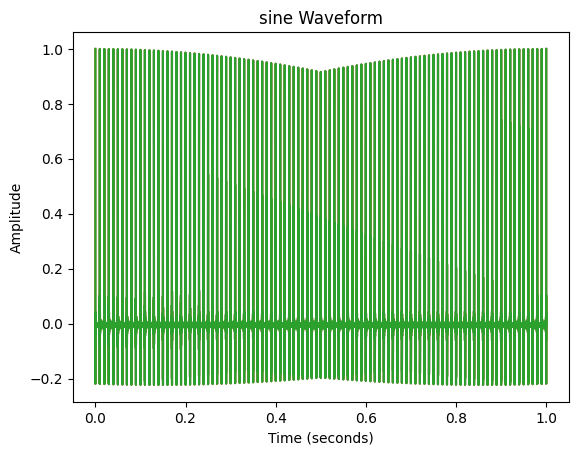

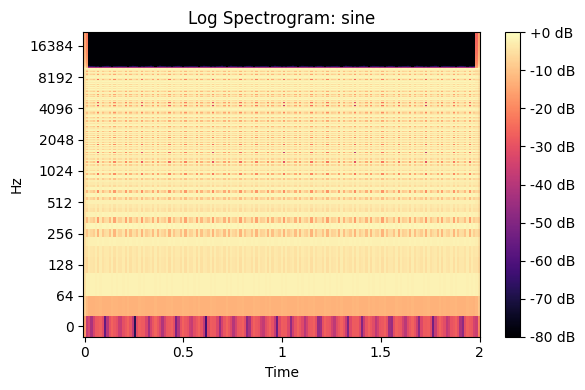

In [295]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sine'
winSize = 1024
specType = 'log'


signal = visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType)

IPython.display.Audio(data=signal, rate=samplingRate)

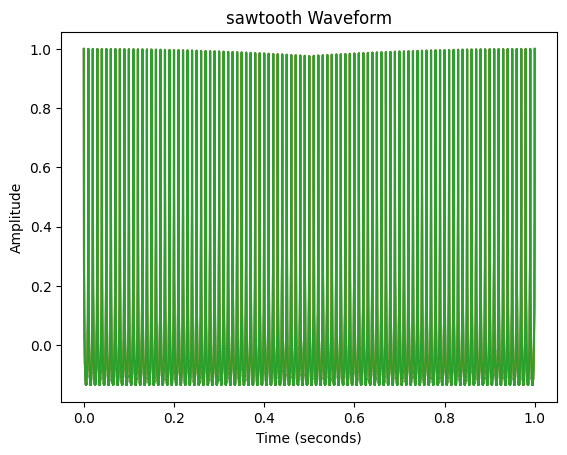

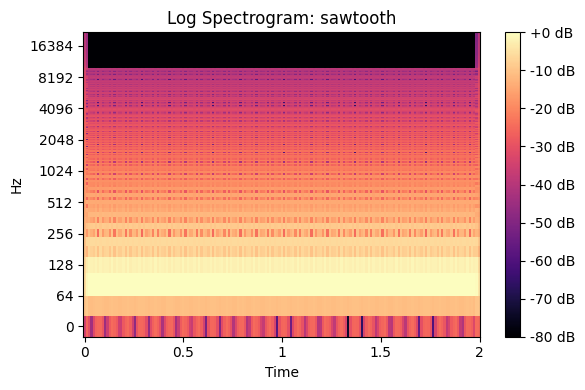

In [291]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sawtooth'
winSize = 1024
specType = 'log'

signal = visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType)

IPython.display.Audio(data=signal, rate=samplingRate)

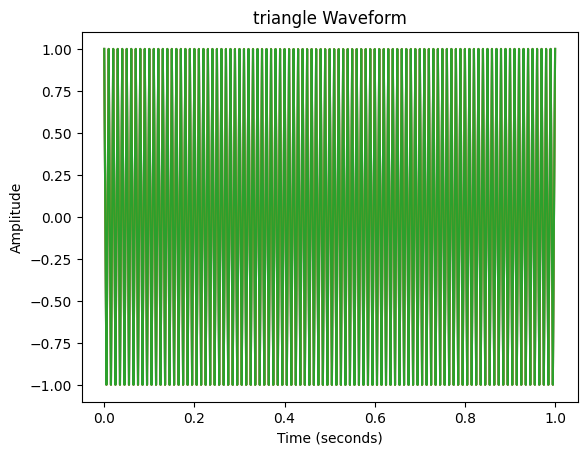

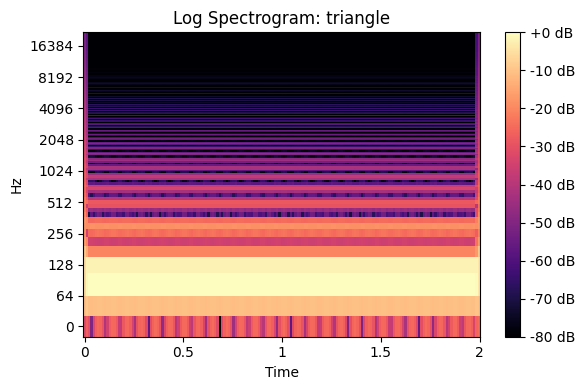

In [292]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'triangle'
winSize = 1024
specType = 'log'

signal = visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType)

IPython.display.Audio(data=signal, rate=samplingRate)

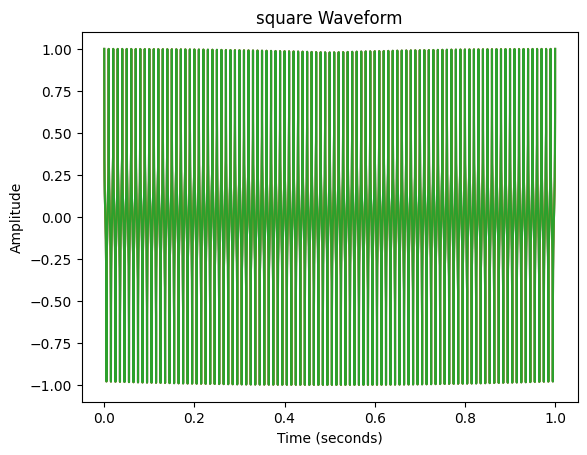

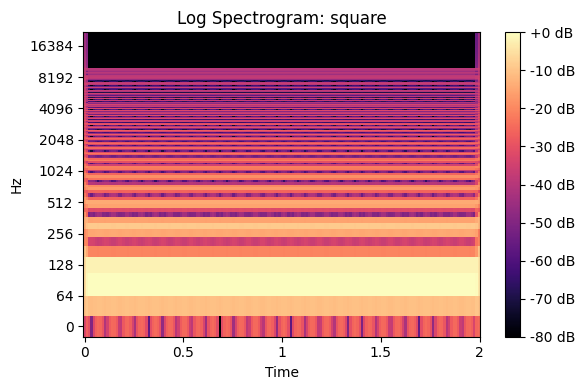

In [293]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'square'
winSize = 1024
specType = 'log'

signal = visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType)

IPython.display.Audio(data=signal, rate=samplingRate)